### Bayesian Data Analysis, 3rd ed
## Chapter 2, demo 1

Authors:
- Aki Vehtari <aki.vehtari@aalto.fi>
- Tuomas Sivula <tuomas.sivula@aalto.fi>

Probability of a girl birth given placenta previa (BDA3 p. 37).
437 girls and 543 boys have been observed. Calculate and plot the posterior distribution of the proportion of girls $\theta $, using
uniform prior on $\theta $.

In [1]:
# import necessary packages

# plotting
%matplotlib inline
import matplotlib.pyplot as plt

# fast array routines for numerical calculation
import numpy as np
# scipy contains various scietific tools, such as beta distribution
from scipy.stats import beta

In [2]:
# edit default plot settings
plt.rc('font', size=12)

The posterior distribution is Beta(438, 544). Plot the distribution.

Uniform prior -> Posterior is Beta(438,544)


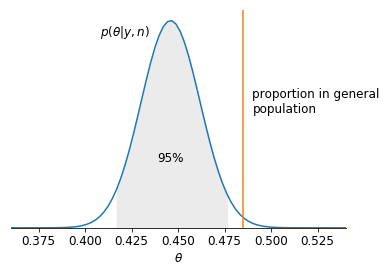

In [3]:
# create grid of 80 points from 0.36 to 0.54
x = np.linspace(0.36, 0.54, 80)
# freeze a beta distribution object with given parameters
dist = beta(438, 544)
# probability density function at x
pd = dist.pdf(x)

print('Uniform prior -> Posterior is Beta(438,544)')

# plot pd
plt.plot(x, pd)
# annotate the line
plt.annotate(
    r'$p(\theta|y,n)$',
    (x[35] - 0.005, pd[35]),
    ha='right'  # horizontalalignment
)

# plot proportion of girl babies in general population as a vertical line
# ``color='C1'`` corresponds to default color #2
plt.axvline(0.485, color='C1')
# annotate the line
plt.annotate(
    'proportion in general\npopulation',
    (0.485 + 0.005, 14),
    ha='left'  # horizontalalignment
)

# find the points in x that are between 2.5% and 97.5% quantile
# dist.ppf is percent point function (inverse of cdf)
x_95_idx = (x > dist.ppf(0.025)) & (x < dist.ppf(0.975))
# shade the 95% central posterior interval
plt.fill_between(x[x_95_idx], pd[x_95_idx], color='0.92')
# add text into the shaded area
plt.text(dist.median(), 8, "95%", horizontalalignment='center')
# add labels and title
plt.xlabel(r'$\theta$')

# remove y-axis ticks
plt.yticks(())
# set axis spines (borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# set bottom ylim to zero
_, ymax = plt.ylim()
plt.ylim((0, ymax))

# scale x-axis tightly to the data.
plt.autoscale(axis='x', tight=True);
# N.B. the last semicolon is here just to prevent ipython notebook
# from displaying the return value of the last command.